In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nba.csv")

In [3]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [4]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [5]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [6]:
df['Number'] = df['Number'].fillna(df['Number'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [7]:
alpha = df.select_dtypes(include = "object")
alpha

,Name,Team,Position,Height,College
0,Avery Bradley,Boston Celtics,PG,6-2,Texas
1,Jae Crowder,Boston Celtics,SF,6-6,Marquette
2,John Holland,Boston Celtics,SG,6-5,Boston University
3,R.J. Hunter,Boston Celtics,SG,6-5,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6-10,NaN
...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,6-3,Butler
454,Raul Neto,Utah Jazz,PG,6-1,NaN
455,Tibor Pleiss,Utah Jazz,C,7-3,NaN
456,Jeff Withey,Utah Jazz,C,7-0,Kansas


In [8]:
alpha.isna().sum()

Name         1
Team         1
Position     1
Height       1
College     85
dtype: int64

In [10]:
alpha.dropna()

,Name,Team,Position,Height,College
0,Avery Bradley,Boston Celtics,PG,6-2,Texas
1,Jae Crowder,Boston Celtics,SF,6-6,Marquette
2,John Holland,Boston Celtics,SG,6-5,Boston University
3,R.J. Hunter,Boston Celtics,SG,6-5,Georgia State
6,Jordan Mickey,Boston Celtics,PF,6-8,LSU
...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,SG,6-8,Duke
451,Chris Johnson,Utah Jazz,SF,6-6,Dayton
452,Trey Lyles,Utah Jazz,PF,6-10,Kentucky
453,Shelvin Mack,Utah Jazz,PG,6-3,Butler


In [11]:
alpha.dropna().isna().sum()

Name        0
Team        0
Position    0
Height      0
College     0
dtype: int64

In [12]:
numeric = df.select_dtypes(include = np.number)
numeric

,Number,Age,Weight,Salary
0,0.000000,25.000000,180.000000,7730337.0
1,99.000000,25.000000,235.000000,6796117.0
2,30.000000,27.000000,205.000000,NaN
3,28.000000,22.000000,185.000000,1148640.0
4,8.000000,29.000000,231.000000,5000000.0
...,...,...,...,...
453,8.000000,26.000000,203.000000,2433333.0
454,25.000000,24.000000,179.000000,900000.0
455,21.000000,26.000000,256.000000,2900000.0
456,24.000000,26.000000,231.000000,947276.0


In [13]:
for i in numeric :
    numeric[i] = (numeric[i] - numeric[i].min()) / (numeric[i].max() - numeric[i].min())
numeric

,Number,Age,Weight,Salary
0,0.000000,0.285714,0.130137,0.308359
1,1.000000,0.285714,0.506849,0.270944
2,0.303030,0.380952,0.301370,NaN
3,0.282828,0.142857,0.164384,0.044765
4,0.080808,0.476190,0.479452,0.199010
...,...,...,...,...
453,0.080808,0.333333,0.287671,0.096217
454,0.252525,0.238095,0.123288,0.034807
455,0.212121,0.333333,0.650685,0.114906
456,0.242424,0.333333,0.479452,0.036701


<Axes: >

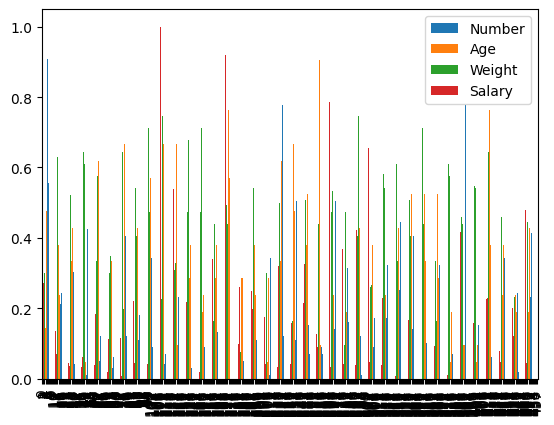

In [15]:
# sns.boxplot(x='Age',data=df)
numeric.plot(kind='bar')

<Axes: >

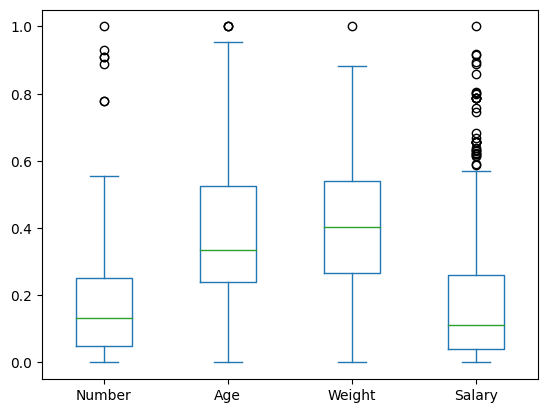

In [16]:
numeric.plot(kind='box')

<Axes: ylabel='Frequency'>

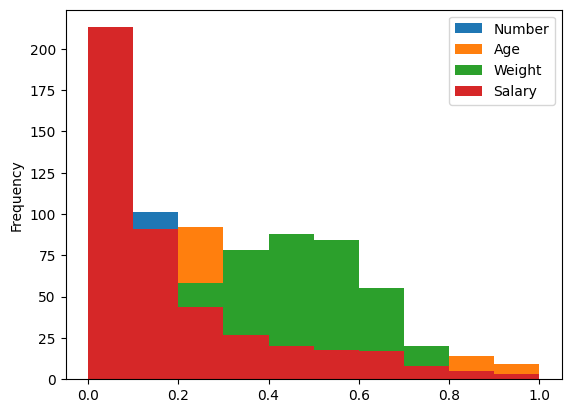

In [17]:
numeric.plot(kind='hist')

In [18]:
zs = df.select_dtypes(include = np.number)
zs

,Number,Age,Weight,Salary
0,0.000000,25.000000,180.000000,7730337.0
1,99.000000,25.000000,235.000000,6796117.0
2,30.000000,27.000000,205.000000,NaN
3,28.000000,22.000000,185.000000,1148640.0
4,8.000000,29.000000,231.000000,5000000.0
...,...,...,...,...
453,8.000000,26.000000,203.000000,2433333.0
454,25.000000,24.000000,179.000000,900000.0
455,21.000000,26.000000,256.000000,2900000.0
456,24.000000,26.000000,231.000000,947276.0


In [19]:
for i in zs:
    zs[i] = (zs[i] - zs[i].min()) / (zs[i].max() - zs[i].min())
zs

,Number,Age,Weight,Salary
0,0.000000,0.285714,0.130137,0.308359
1,1.000000,0.285714,0.506849,0.270944
2,0.303030,0.380952,0.301370,NaN
3,0.282828,0.142857,0.164384,0.044765
4,0.080808,0.476190,0.479452,0.199010
...,...,...,...,...
453,0.080808,0.333333,0.287671,0.096217
454,0.252525,0.238095,0.123288,0.034807
455,0.212121,0.333333,0.650685,0.114906
456,0.242424,0.333333,0.479452,0.036701


<Axes: ylabel='Frequency'>

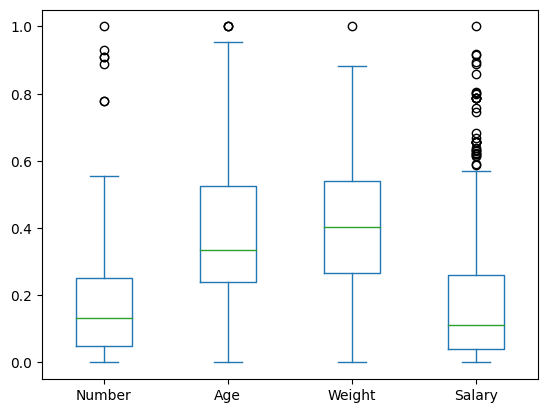

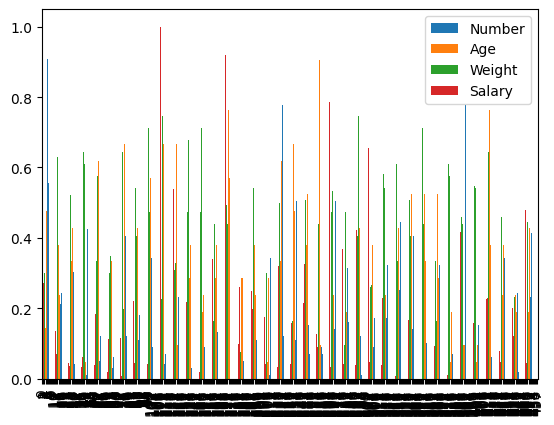

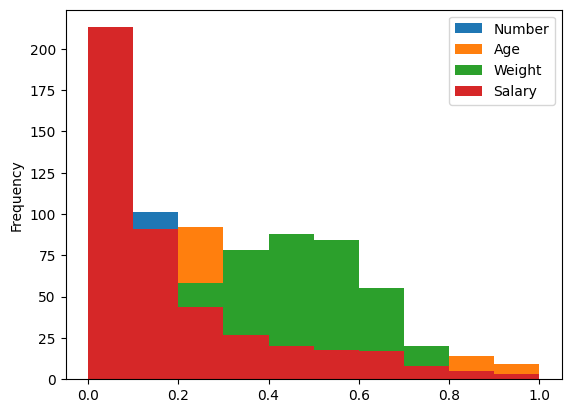

In [21]:
zs.plot(kind='box')
zs.plot(kind='bar')
zs.plot(kind='hist')